In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df = pd.concat([exercise,calories['Calories']],axis=1)

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df.shape

(15000, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Data Analysis and Visualization

In [12]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

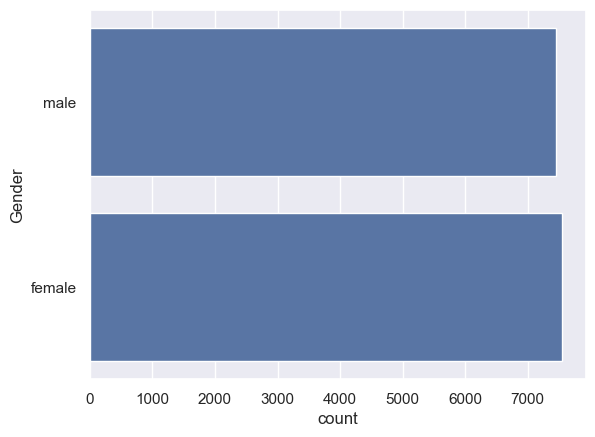

In [22]:
# plotting the gender column
sns.countplot(df['Gender'])

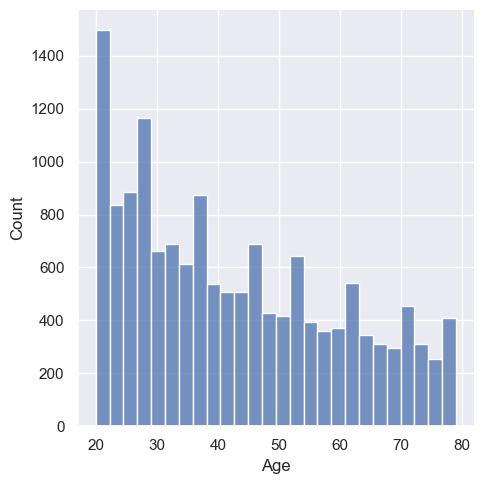

In [30]:
sns.displot(df['Age'])

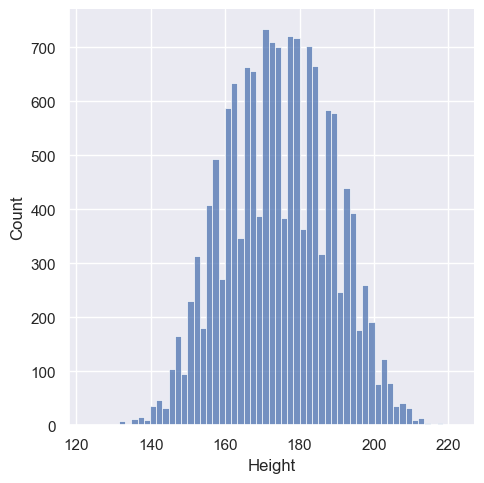

In [31]:
sns.displot(df['Height'])

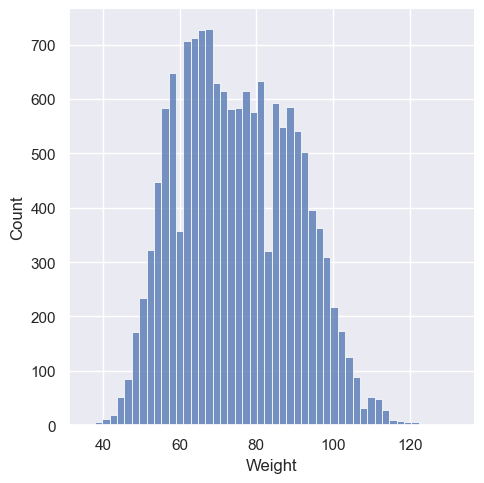

In [32]:
sns.displot(df['Weight'])

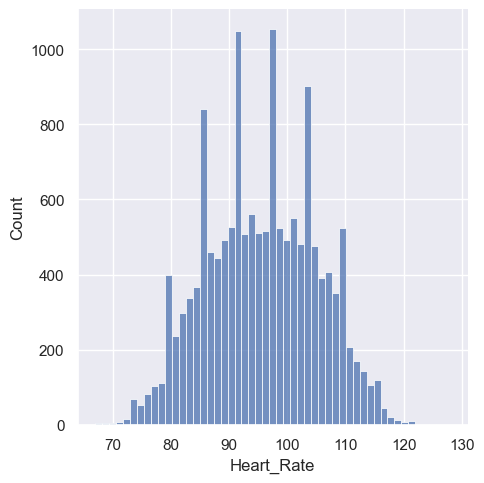

In [33]:
sns.displot(df['Heart_Rate'])

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
correlation = df.corr()

In [42]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

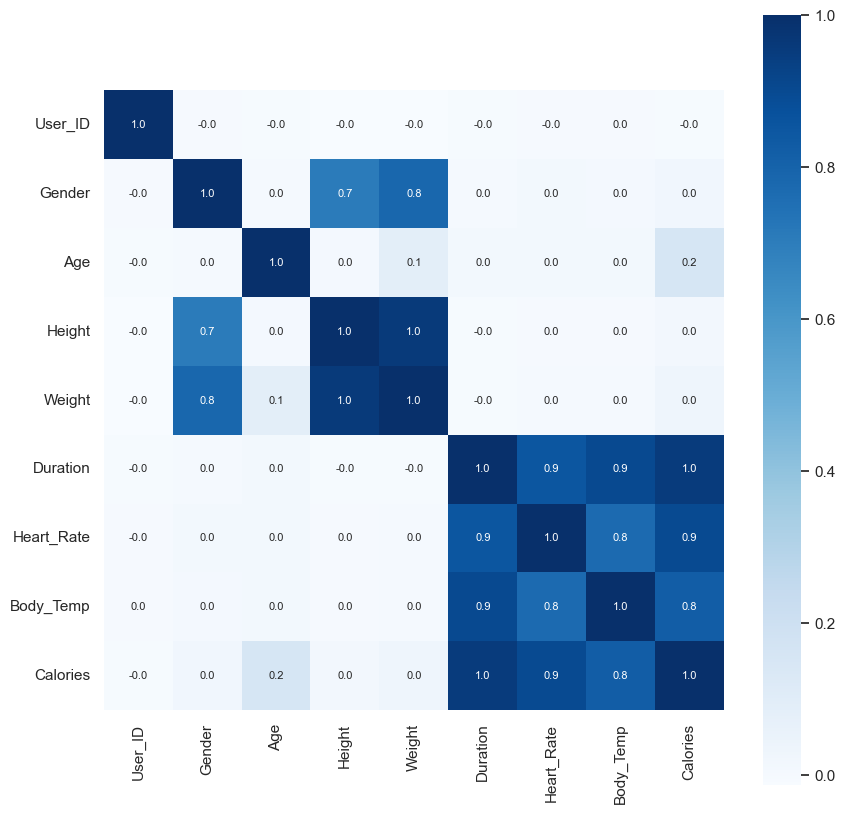

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square=True,fmt='.1f',annot = True,annot_kws={'size':8},cmap='Blues')

In [59]:
X = df.drop(columns = ['Calories','User_ID'])
y = df['Calories']

In [60]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [61]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,1,37,179.0,77.0,7.0,81.0,39.5
9680,1,23,195.0,87.0,26.0,110.0,40.5
7093,1,33,181.0,77.0,12.0,88.0,40.1
11293,0,66,156.0,54.0,9.0,77.0,39.5
820,0,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,0,75,148.0,51.0,22.0,104.0,40.6
13418,0,21,172.0,67.0,20.0,104.0,40.7
5390,1,57,189.0,92.0,8.0,90.0,39.5
860,1,35,174.0,76.0,12.0,97.0,40.2


In [66]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,0,45,154.0,52.0,26.0,107.0,40.6
6475,1,21,187.0,90.0,29.0,111.0,40.5
13167,1,58,176.0,77.0,11.0,90.0,40.0
862,1,35,182.0,89.0,24.0,108.0,40.8
5970,0,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,0,61,166.0,66.0,28.0,106.0,41.0
3585,0,73,165.0,66.0,10.0,92.0,40.0
10023,0,38,169.0,66.0,20.0,104.0,40.2
14044,0,25,163.0,54.0,5.0,86.0,39.2


# Model Training

In [67]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
test_data_prediction = model.predict(X_test)

In [70]:
test_data_prediction

array([172.07645 , 195.7858  ,  51.708874, ..., 121.50776 ,  19.239851,
       214.43597 ], dtype=float32)

In [71]:
mae = metrics.mean_absolute_error(y_test,test_data_prediction)

In [73]:
print('Mean Absolute Error',mae)

Mean Absolute Error 1.4981198125282924
